In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from timeit import default_timer as timer

In [2]:
def partition(arr, start, end):
    # select last element as a pivot (from the book)
    pivot_index = end
    pivot_value = arr[end]
    
    left = start
    right = end - 1
    
    while True:
        while left < end and arr[left] < pivot_value:
            left += 1
        
        while right > start and arr[right] > pivot_value:
            right -= 1
        
        if left >= right:
            arr[left], arr[pivot_index] = arr[pivot_index], arr[left]
            return left
        else:
            arr[left], arr[right] = arr[right], arr[left]
        
        left += 1
        right -= 1
    
    raise Exception("Unreachable")

def quickselect_implementation(arr, start, end, k):
    pivot_index = partition(arr, start, end)
    
    if pivot_index == k:
        return pivot_index
    if k < pivot_index:
        return quickselect_implementation(arr, start, pivot_index - 1, k)
    if k > pivot_index:
        return quickselect_implementation(arr, pivot_index + 1, end, k)

def quickselect(arr, k):
    if k not in range(0, len(arr)):
        raise Exception("k should represent valid position inside of array")
    
    pivot_index = quickselect_implementation(arr, 0, len(arr) - 1, k)
    
    return arr[pivot_index]

In [3]:
print(quickselect([1], 0))

print(quickselect([1, 2], 0))
print(quickselect([1, 2], 1))

print(quickselect([1, 2, 3], 0))
print(quickselect([1, 2, 3], 1))
print(quickselect([1, 2, 3], 2))

print(quickselect([1, 2, 3, 4], 0))
print(quickselect([1, 2, 3, 4], 1))
print(quickselect([1, 2, 3, 4], 2))
print(quickselect([1, 2, 3, 4], 3))

1
1
2
1
2
3
1
2
3
4


In [4]:
quickselect([], 0)

Exception: k should represent valid position inside of array

In [5]:
quickselect([1, 2, 3], 4)

Exception: k should represent valid position inside of array

In [7]:
df = pd.DataFrame(columns=("array_size", "time"));

# be careful with size, because time complexity is quadratic
sizes = np.arange(1, 1000)
# 100 takes around half an hour
number_of_trials = 100

for array_size in sizes:
    arr = np.arange(array_size)
    rng = np.random.default_rng()
    rng.shuffle(arr)
    
    for i in range(number_of_trials):
        position = rng.integers(0, array_size)
        
        start = timer()
        sorted_arr = quickselect(arr, position)
        end = timer()
        delta = end - start
        
        new_row = {
            "array_size": array_size,
            "time": delta
        }
        
        df.loc[len(df)] = new_row

df

,array_size,time
0,1,0.000165
1,1,0.000010
2,1,0.000009
3,1,0.000009
4,1,0.000019
...,...,...
99895,999,0.122795
99896,999,0.080270
99897,999,0.055479
99898,999,0.090079


<AxesSubplot:xlabel='array_size', ylabel='time'>

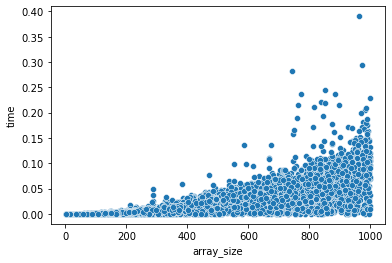

In [8]:
df_sample = df.sample(5000)
sns.scatterplot(data=df_sample, x="array_size", y="time")

In [9]:
df_mean_times = df.groupby('array_size', as_index=False).agg(mean_time=pd.NamedAgg(column="time", aggfunc="mean"))
df_mean_times

,array_size,mean_time
0,1,0.000017
1,2,0.000012
2,3,0.000014
3,4,0.000016
4,5,0.000018
...,...,...
994,995,0.076488
995,996,0.086107
996,997,0.078660
997,998,0.090753


<AxesSubplot:xlabel='array_size', ylabel='mean_time'>

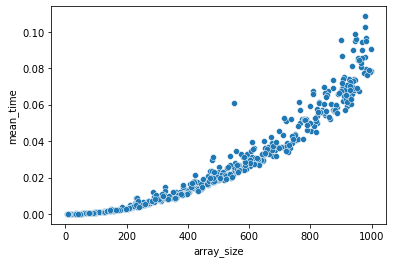

In [10]:
sns.scatterplot(data=df_mean_times.sample(500), x="array_size", y="mean_time")

Doesn't really look linear